In [50]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score, f1_score,ConfusionMatrixDisplay
import shap as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set()

ModuleNotFoundError: No module named 'shap'

In [2]:
df=pd.read_csv("data_ransomware.csv")
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [32]:
benign=df['Benign'].value_counts()
benign

Benign
0    35367
1    27118
Name: count, dtype: int64

In [3]:
X = df.drop(columns=['FileName', 'md5Hash'])
y=df['Benign']
missing_values = X.isnull().sum()
missing_values

Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

In [5]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#Entrenamiento de los modelos
rFM=RandomForestClassifier(n_estimators=100, random_state=42)
kNN=KNeighborsClassifier()
gNB=GaussianNB()
DT=DecisionTreeClassifier()
logreg=LogisticRegression()
gNT=GradientBoostingClassifier()
aDB=AdaBoostClassifier()

## Random Forest

In [7]:
#Random Forest
rFM.fit(X_train, y_train)
y_pred_rFM=rFM.predict(X_test)

In [8]:
acc=accuracy_score(y_test,y_pred_rFM)
pre=precision_score(y_test,y_pred_rFM)
recall = recall_score(y_test, y_pred_rFM)
f1= f1_score(y_test, y_pred_rFM)
print("\t- Exactitud: ",round(acc*100, 5),'%')
print("\t- Precisión: ", round(pre*100, 5), '%')
print("\t- Recall: ", round(recall*100, 5), '%')
print("\t- F1 Score: ", round(f1*100, 5), '%')

	- Exactitud:  100.0 %
	- Precisión:  100.0 %
	- Recall:  100.0 %
	- F1 Score:  100.0 %


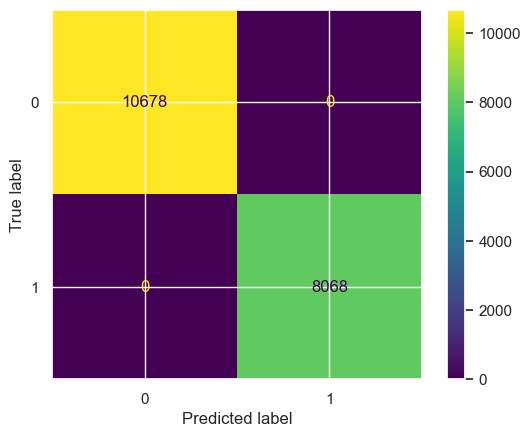

In [9]:
cm = confusion_matrix(y_test, y_pred_rFM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## k Neighbord 

In [10]:
kNN.fit(X_train, y_train)
y_pred_kNN=kNN.predict(X_test)

In [11]:
acc_kNN=accuracy_score(y_test,y_pred_kNN)
pre_kNN=precision_score(y_test,y_pred_kNN)
recall_kNN=recall_score(y_test, y_pred_kNN)
f1_kNN=f1_score(y_test, y_pred_kNN)
print("\t- Exactitud: ",round(acc_kNN*100, 5),'%')
print("\t- Precisión: ", round(pre_kNN*100, 5), '%')
print("\t- Recall: ", round(recall_kNN*100, 5), '%')
print("\t- F1 Score: ", round(f1_kNN*100, 5), '%')

	- Exactitud:  97.64216 %
	- Precisión:  97.86593 %
	- Recall:  96.62866 %
	- F1 Score:  97.24336 %


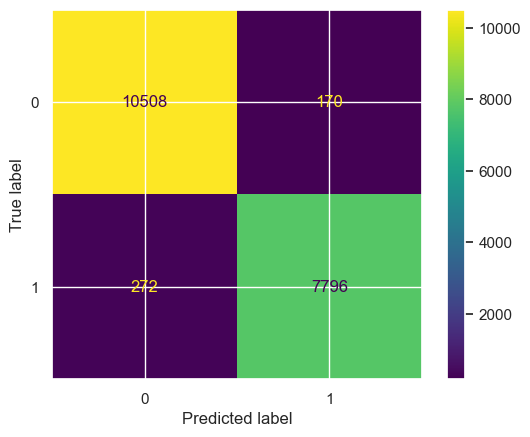

In [12]:
cm = confusion_matrix(y_test, y_pred_kNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## GNB

In [13]:
gNB.fit(X_train,y_train)
y_pred_gNB=gNB.predict(X_test)

In [14]:
acc_gNB=accuracy_score(y_test,y_pred_gNB)
pre_gNB=precision_score(y_test,y_pred_gNB)
recall_gNB=recall_score(y_test, y_pred_gNB)
f1_gNB=f1_score(y_test, y_pred_gNB)
print("\t- Exactitud: ",round(acc_gNB*100, 5),'%')
print("\t- Precisión: ", round(pre_gNB*100, 5), '%')
print("\t- Recall: ", round(recall_gNB*100, 5), '%')
print("\t- F1 Score: ", round(f1_gNB*100, 5), '%')

	- Exactitud:  43.04385 %
	- Precisión:  43.02966 %
	- Recall:  99.81408 %
	- F1 Score:  60.13516 %


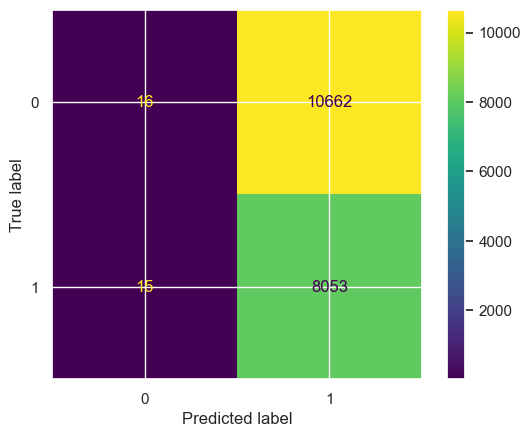

In [15]:
cm = confusion_matrix(y_test, y_pred_gNB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Decision Tree

In [16]:
DT.fit(X_train,y_train)
y_pre_dt=DT.predict(X_test)

In [17]:
acc_dt=accuracy_score(y_test,y_pre_dt)
pre_dt=precision_score(y_test,y_pre_dt)
recall_dt= recall_score(y_test, y_pre_dt)
f1_dt=f1_score(y_test, y_pre_dt)
print("\t- Exactitud: ",round(acc_dt*100, 5),'%')
print("\t- Precisión: ", round(pre_dt*100, 5), '%')
print("\t- Recall: ", round(recall_dt*100, 5), '%')
print("\t- F1 Score: ", round(f1_dt*100, 5), '%')

	- Exactitud:  100.0 %
	- Precisión:  100.0 %
	- Recall:  100.0 %
	- F1 Score:  100.0 %


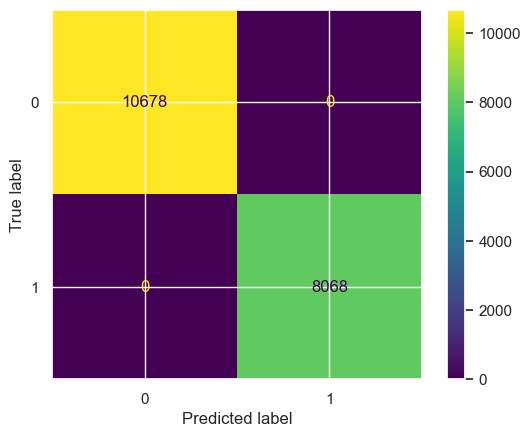

In [18]:
cm = confusion_matrix(y_test, y_pre_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [19]:
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)

C:\Users\billy\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
acc_logreg=accuracy_score(y_test,y_pred_logreg)
pre_logreg=precision_score(y_test,y_pred_logreg)
recall_logreg= recall_score(y_test, y_pred_logreg)
f1_logreg=f1_score(y_test, y_pred_logreg)
print("\t- Exactitud: ",round(acc_logreg*100, 5),'%')
print("\t- Precisión: ", round(pre_logreg*100, 5), '%')
print("\t- Recall: ", round(recall_logreg*100, 5), '%')
print("\t- F1 Score: ", round(f1_logreg*100, 5), '%')

	- Exactitud:  78.83282 %
	- Precisión:  86.38623 %
	- Recall:  60.32474 %
	- F1 Score:  71.04072 %


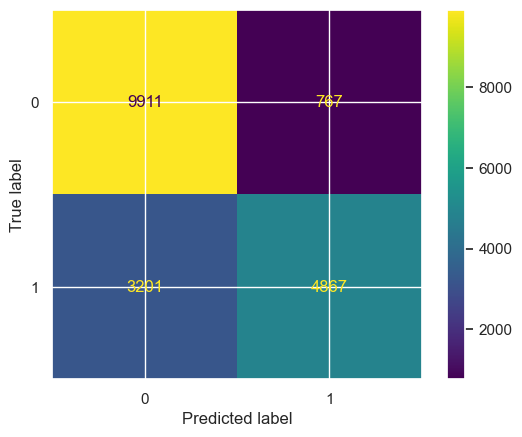

In [21]:
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Gradient Boosting Trees

In [22]:
gNT.fit(X_train,y_train)
y_pred_gNT=gNT.predict(X_test)

In [23]:
acc_gnt=accuracy_score(y_test,y_pred_gNT)
pre_gnt=precision_score(y_test,y_pred_gNT)
recall_gnt= recall_score(y_test, y_pred_gNT)
f1_gnt=f1_score(y_test,y_pred_gNT)
print("\taccuracy:",round(acc_gnt*100,5),'%')
print("\tprecisión:",round(pre_gnt*100,5),'%')
print('\trecall:',round(recall_gnt*100,5),'%')
print('\tF1 Score',round(f1_gnt*100,5),'%')

	accuracy: 100.0 %
	precisión: 100.0 %
	recall: 100.0 %
	F1 Score 100.0 %


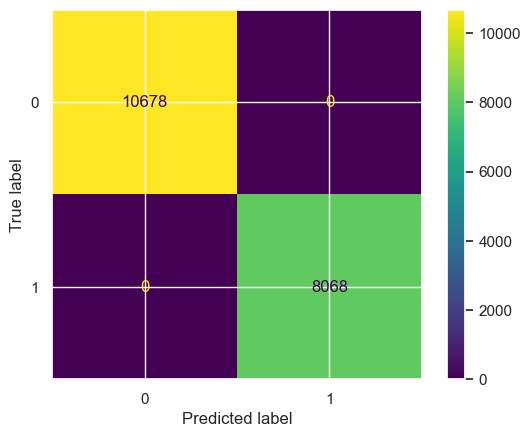

In [24]:
cm = confusion_matrix(y_test, y_pred_gNT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## AB

In [25]:
aDB.fit(X_train,y_train)
y_pred_adb=aDB.predict(X_test)

C:\Users\billy\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [26]:
acc_adb=accuracy_score(y_test,y_pred_adb)
pre_adb=precision_score(y_test,y_pred_adb)
recall_adb= recall_score(y_test, y_pred_adb)
f1_adb=f1_score(y_test, y_pred_adb)
print("\t- Exactitud: ",round(acc_adb*100, 5),'%')
print("\t- Precisión: ", round(pre_adb*100, 5), '%')
print("\t- Recall: ", round(recall_adb*100, 5), '%')
print("\t- F1 Score: ", round(f1_adb*100, 5), '%')

	- Exactitud:  100.0 %
	- Precisión:  100.0 %
	- Recall:  100.0 %
	- F1 Score:  100.0 %


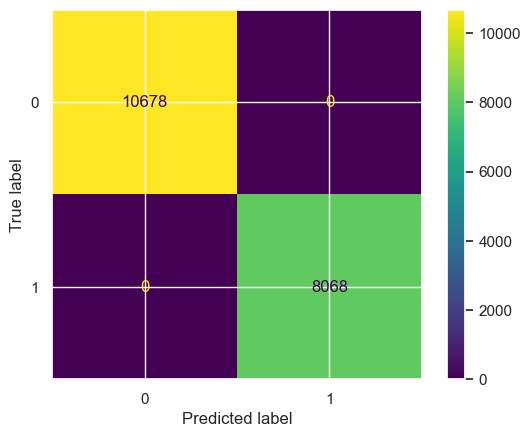

In [27]:
cm = confusion_matrix(y_test, y_pred_adb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

ROC Curve

In [28]:
#RF
fpr_rf,tpr_rf,_rf=roc_curve(y_test,y_pred_rFM)
roc_auc_rf=auc(fpr_rf,tpr_rf)
#kNN
fpr_knn,tpr_knn,_knn=roc_curve(y_test,y_pred_kNN)
roc_auc_knn=auc(fpr_knn,tpr_rf)
#GNB
fpr_gnb,tpr_gnb,_gnb=roc_curve(y_test,y_pred_gNB)
roc_auc_gnb=auc(fpr_gnb,tpr_gnb)
#DT
fpr_dt,tpr_dt,_dt=roc_curve(y_test,y_pre_dt)
roc_auc_dt=auc(fpr_dt,tpr_dt)
#LG
fpr_lg,tpr_lg,_lg=roc_curve(y_test,y_pred_logreg)
roc_lg=auc(fpr_lg,tpr_lg)
#GN
fpr_gn,tpr_gn,_gn=roc_curve(y_test,y_pred_gNT)
roc_auc_gn=auc(fpr_gn,tpr_gn)
#AB
fpr_ab,tpr_ab,_ab=roc_curve(y_test,y_pred_adb)
roc_auc_ab=auc(fpr_ab,tpr_ab)

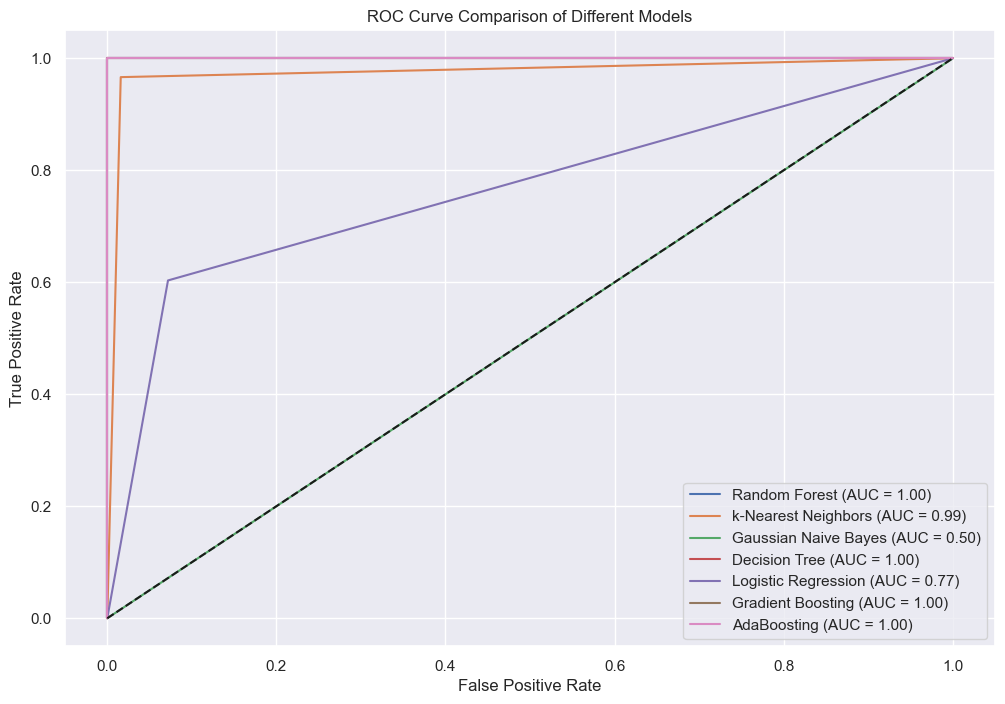

In [29]:
plt.figure(figsize=(12, 8))
# Plot ROC for each model
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'k-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lg, tpr_lg, label=f'Logistic Regression (AUC = {roc_lg:.2f})')
plt.plot(fpr_gn, tpr_gn, label=f'Gradient Boosting (AUC = {roc_auc_gn:.2f})')
plt.plot(fpr_ab, tpr_ab, label=f'AdaBoosting (AUC = {roc_auc_ab:.2f})')
# Plot configuration
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Different Models')
plt.legend(loc='lower right')
plt.show()

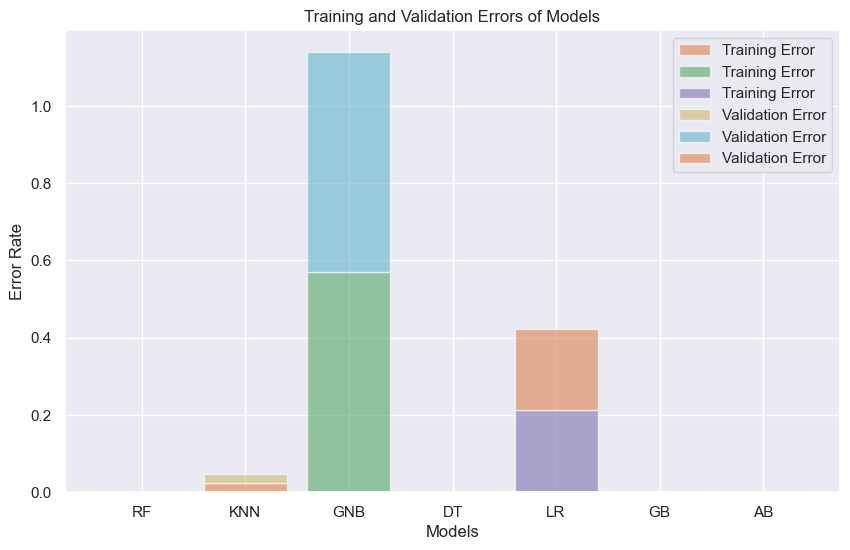

In [35]:
## PDP

train_error_rf=1-acc
train_error_knn=1-acc_kNN
train_error_gnb=1-acc_gNB
train_error_dt=1-acc_dt
train_error_lg=1-acc_logreg
train_error_gb=1-acc_gnt
train_error_ab=1-acc_adb

val_error_rf=1-accuracy_score(y_test,y_pred_rFM)
val_error_knn=1-accuracy_score(y_test,y_pred_kNN)
val_error_gnb=1-accuracy_score(y_test,y_pred_gNB)
val_error_dt=1-accuracy_score(y_test,y_pre_dt)
val_error_lg=1-accuracy_score(y_test,y_pred_logreg)
val_error_gb=1-accuracy_score(y_test,y_pred_gNT)
val_error_ab=1-accuracy_score(y_test,y_pred_adb)

plt.figure(figsize=(10, 6))

plt.bar('RF',train_error_rf, alpha=0.6)
plt.bar('KNN',train_error_knn, alpha=0.6, label='Training Error')
plt.bar('GNB',train_error_gnb, alpha=0.6, label='Training Error')
plt.bar('DT',train_error_dt, alpha=0.6)
plt.bar('LR',train_error_lg, alpha=0.6, label='Training Error')
plt.bar('GB',train_error_gb, alpha=0.6, )
plt.bar('AB',train_error_ab, alpha=0.6, )

plt.bar('RF',val_error_rf, alpha=0.6,bottom=train_error_rf)
plt.bar('KNN',val_error_knn, alpha=0.6, label='Validation Error',bottom=train_error_knn)
plt.bar('GNB',val_error_gnb, alpha=0.6, label='Validation Error',bottom=train_error_gnb)
plt.bar('DT',val_error_dt, alpha=0.6,bottom=train_error_dt)
plt.bar('LR',val_error_lg, alpha=0.6, label='Validation Error',bottom=train_error_lg)
plt.bar('GB',val_error_gb, alpha=0.6,bottom=train_error_gb)
plt.bar('AB',val_error_ab, alpha=0.6,bottom=train_error_ab)


plt.xlabel('Models')

plt.ylabel('Error Rate')

plt.title('Training and Validation Errors of Models')

plt.legend()

plt.show()


In [47]:

explainer=sp.KernelExplainer(rFM,sp.kmeans(X_train,10))
shap_values=explainer.shap_values(X_test,check_additivity=False)

plt.title(f"SHAP Summary Plot for Random forest")
sp.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.show()

NameError: name 'sp' is not defined